In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


# Imported libraries

In [2]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MaxNLocator

# Download data

In [3]:
# Download latest version
path = kagglehub.dataset_download("shree1992/housedata")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/housedata


In [4]:
# Build the full file path to the CSV file inside the dataset folder
csv_path = f"{path}/data.csv"

# Read the CSV file into a pandas DataFrame
houseprice_df = pd.read_csv(csv_path)

# Show the first 5 rows of the dataset to check the data
houseprice_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
# Display the shape of the dataset (number of rows, number of columns)
houseprice_df.shape

(4600, 18)

# Data Cleaning

In [6]:
# Show descriptive statistics (count, mean, std, min, quartiles, max) 
houseprice_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
# Data structure of the houseprice_df DataFrame
houseprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [8]:
# Check for missing values in each column of the dataset
# Returns a Series with column names as index and number of nulls as values
houseprice_df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [9]:
# Extract state using lambda
houseprice_df['state'] = houseprice_df['statezip'].apply(lambda x: x.split(' ')[0])

# Extract zip, convert to integer using lambda
houseprice_df['zip'] = houseprice_df['statezip'].apply(lambda x: int(x.split(' ')[1]))

# Drop the old 'statezip' column
houseprice_df = houseprice_df.drop(columns=['statezip'])

# Show first 5 rows
houseprice_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,country,state,zip
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,USA,WA,98133
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,USA,WA,98119
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,USA,WA,98042
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,USA,WA,98008
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,USA,WA,98052


## Featured Engineering

In [10]:
# Price per living square feet
houseprice_df['price_per_sqft_living'] = houseprice_df['price'] / houseprice_df['sqft_living']
houseprice_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,country,state,zip,price_per_sqft_living
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,USA,WA,98133,233.582090
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,USA,WA,98119,653.150685
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,USA,WA,98042,177.202073
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,USA,WA,98008,210.000000
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,USA,WA,98052,283.505155


In [11]:
# Show descriptive statistics (count, mean, std, min, quartiles, max) 
houseprice_df['price_per_sqft_living'].describe()

count     4600.000000
mean       265.876260
std        357.503344
min          0.000000
25%        180.819021
50%        243.853874
75%        314.843619
max      22533.898305
Name: price_per_sqft_living, dtype: float64

In [12]:
# Assign each value to a 50-unit bin
houseprice_df['price_bin'] = (houseprice_df['price_per_sqft_living'] // 50) * 50
houseprice_df[['price_per_sqft_living','price_bin']]

,price_per_sqft_living,price_bin
0,233.582090,200.0
1,653.150685,650.0
2,177.202073,150.0
3,210.000000,200.0
4,283.505155,250.0
...,...,...
4595,204.083885,200.0
4596,365.981735,350.0
4597,138.506368,100.0
4598,97.320574,50.0


## Inspect the price distribution

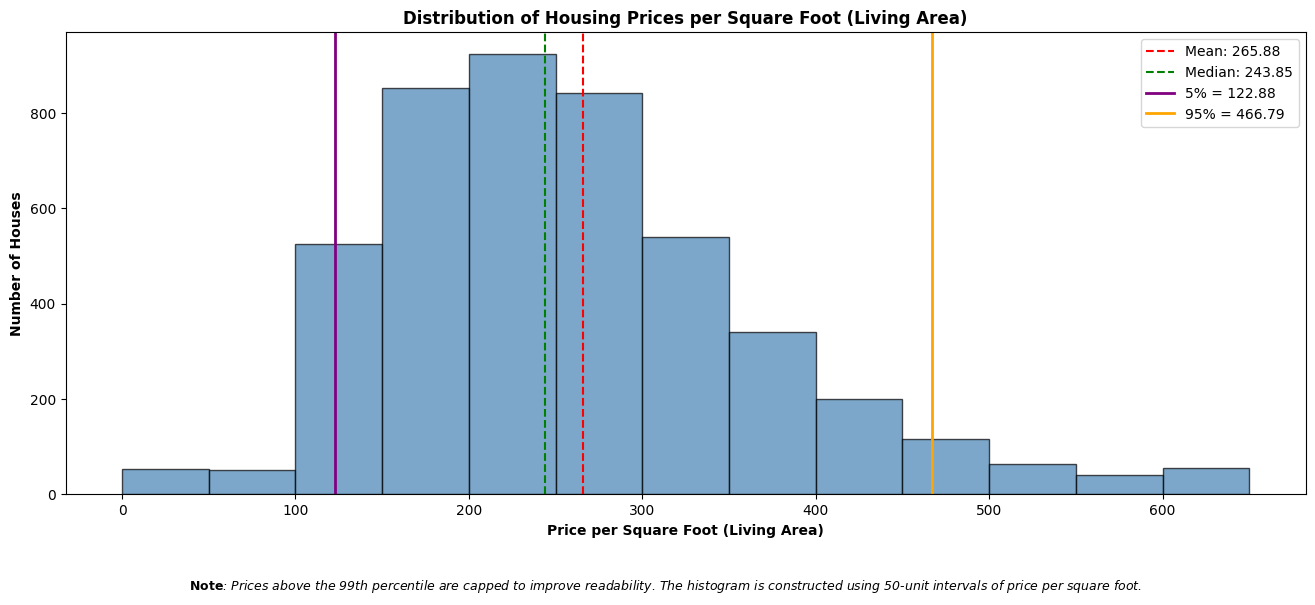

In [13]:
# Some descriptive statistics
mean_price = houseprice_df['price_per_sqft_living'].mean()
median_price = houseprice_df['price_per_sqft_living'].median()
upper_price_limit = houseprice_df['price_per_sqft_living'].quantile(0.95)
upper_price_limit_1 = houseprice_df['price_per_sqft_living'].quantile(0.99)
lower_price_limit = houseprice_df['price_per_sqft_living'].quantile(0.05)

# Assign each value to a 50-unit bin (clipped at 99th percentile)
houseprice_df['price_bin'] = (houseprice_df['price_per_sqft_living'].clip(upper=upper_price_limit_1) // 50) * 50

# Build bins from the clipped price_bin values
bin_min = int(houseprice_df['price_bin'].min())
bin_max = int(houseprice_df['price_bin'].max()) + 50
bin_edges = range(bin_min, bin_max + 1, 50)

# Histogram with explicit bins
plt.figure(figsize=(16, 6))
plt.hist(
    houseprice_df['price_per_sqft_living'].clip(upper=upper_price_limit_1),
    bins=bin_edges,
    color="steelblue",
    edgecolor="black",
    alpha=0.7)

# Reference lines
plt.axvline(mean_price, color='red', linestyle='--', label=f"Mean: {mean_price:.2f}")
plt.axvline(median_price, color='green', linestyle='--', label=f"Median: {median_price:.2f}")
plt.axvline(lower_price_limit, color='purple', linestyle='solid', linewidth=2, label=f"5% = {lower_price_limit:.2f}")
plt.axvline(upper_price_limit, color='orange', linestyle='solid', linewidth=2, label=f"95% = {upper_price_limit:.2f}")

# Labels & title
plt.title('Distribution of Housing Prices per Square Foot (Living Area)', fontweight='bold')
plt.xlabel('Price per Square Foot (Living Area)', fontweight='bold')
plt.ylabel('Number of Houses', fontweight='bold')
plt.legend()

# Caption
plt.figtext(
    0.5, -0.05,
    r"$\bf{Note}$: Prices above the 99th percentile are capped to improve readability. "
    r"The histogram is constructed using 50-unit intervals of price per square foot.",
    wrap=True, horizontalalignment='center', fontsize=9, style='italic')

plt.show()

## Remove outliers

In [14]:
# Median of price_per_sqft_living
median_price = houseprice_df['price_per_sqft_living'].median()

# Median Absolute Deviation (MAD)
mad_price = (houseprice_df['price_per_sqft_living'] - median_price).abs().median()

# Modified Z-Score
modified_z_scores = 0.6745 * (houseprice_df['price_per_sqft_living'] - median_price) / mad_price

# Threshold (3.5) + remove zero/negative ---
threshold = 3.5
mask = (modified_z_scores.abs() <= threshold) & (houseprice_df['price_per_sqft_living'] > 0)
cleaned_price_df = houseprice_df[mask].copy()

# Print row counts
print(f"Original rows: {len(houseprice_df)}")
print(f"After removing outliers + non-positive: {len(cleaned_price_df)}")

Original rows: 4600
After removing outliers + non-positive: 4491


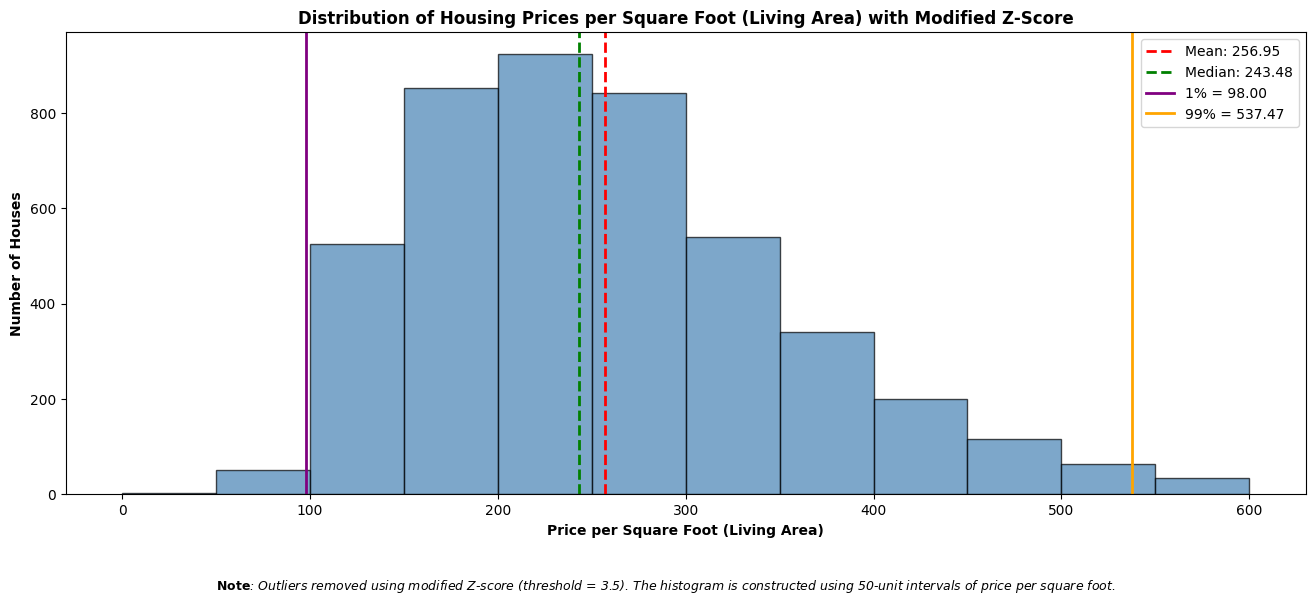

In [15]:
# Recalculate stats on cleaned and filtered data
mean_price = cleaned_price_df['price_per_sqft_living'].mean()
median_price = cleaned_price_df['price_per_sqft_living'].median()
upper_price_limit = cleaned_price_df['price_per_sqft_living'].quantile(0.99)
lower_price_limit = cleaned_price_df['price_per_sqft_living'].quantile(0.01)

# Assign each filtered value to a 50-unit bin
cleaned_price_df['price_bin'] = (cleaned_price_df['price_per_sqft_living'] // 50) * 50

# Build bins from filtered price_bin values
bin_min = int(cleaned_price_df['price_bin'].min())
bin_max = int(cleaned_price_df['price_bin'].max()) + 50
bin_edges = range(bin_min, bin_max + 1, 50)

# Histogram
plt.figure(figsize=(16, 6))
plt.hist(
    cleaned_price_df['price_per_sqft_living'],
    bins=bin_edges,
    color="steelblue",
    edgecolor="black",
    alpha=0.7)

# Reference lines
plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_price:.2f}")
plt.axvline(median_price, color='green', linestyle='--', linewidth=2, label=f"Median: {median_price:.2f}")
plt.axvline(lower_price_limit, color='purple', linestyle='solid', linewidth=2, label=f"1% = {lower_price_limit:.2f}")
plt.axvline(upper_price_limit, color='orange', linestyle='solid', linewidth=2, label=f"99% = {upper_price_limit:.2f}")

# Labels & title
plt.title("Distribution of Housing Prices per Square Foot (Living Area) with Modified Z-Score", fontweight='bold')
plt.xlabel('Price per Square Foot (Living Area)', fontweight='bold')
plt.ylabel('Number of Houses', fontweight='bold')
# Right-aligned legend
plt.legend(loc='upper right', frameon=True) #bbox_to_anchor=(1, 0)

# Caption
plt.figtext(
    0.5, -0.05,
    r"$\bf{Note}$: Outliers removed using modified Z-score (threshold = 3.5). "
    r"The histogram is constructed using 50-unit intervals of price per square foot.",
    wrap=True, horizontalalignment='center', fontsize=9, style='italic')

plt.show()

In [16]:
# Keep only rows within [1%, 99%] range
cleaned_price_df = cleaned_price_df[
    (cleaned_price_df['price_per_sqft_living'] >= lower_price_limit) &
    (cleaned_price_df['price_per_sqft_living'] <= upper_price_limit)
].copy()

print(f"Rows after trimming to 1%-99% range: {len(cleaned_price_df)}")
display(cleaned_price_df.head())
cleaned_price_df.shape

Rows after trimming to 1%-99% range: 4401


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,country,state,zip,price_per_sqft_living,price_bin
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,0,1955,2005,18810 Densmore Ave N,Shoreline,USA,WA,98133,233.582090,200.0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,1966,0,26206-26214 143rd Ave SE,Kent,USA,WA,98042,177.202073,150.0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,1000,1963,0,857 170th Pl NE,Bellevue,USA,WA,98008,210.000000,200.0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,800,1976,1992,9105 170th Ave NE,Redmond,USA,WA,98052,283.505155,250.0
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,...,0,1976,0,2616 174th Ave NE,Redmond,USA,WA,98052,248.148148,200.0


(4401, 21)

In [17]:
# Inspect columns name
cleaned_price_df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'country', 'state', 'zip', 'price_per_sqft_living', 'price_bin'],
      dtype='object')

In [18]:
# Keep only selected columns
columns_to_keep = [
    'date', 'price', 'bedrooms', 'bathrooms',
    'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'city', 'country', 'state', 'zip', 'price_per_sqft_living', 'price_bin']

cleaned_price_df = cleaned_price_df[columns_to_keep].copy()

display(cleaned_price_df.head())
print(f"Shape after column reduction: {cleaned_price_df.shape}")

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,yr_built,yr_renovated,city,country,state,zip,price_per_sqft_living,price_bin
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,1.5,0,0,3,1955,2005,Shoreline,USA,WA,98133,233.582090,200.0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,1.0,0,0,4,1966,0,Kent,USA,WA,98042,177.202073,150.0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,1.0,0,0,4,1963,0,Bellevue,USA,WA,98008,210.000000,200.0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,1.0,0,0,4,1976,1992,Redmond,USA,WA,98052,283.505155,250.0
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,1.0,0,0,3,1976,0,Redmond,USA,WA,98052,248.148148,200.0


Shape after column reduction: (4401, 17)


## Visualization

### **Average House Price per City**

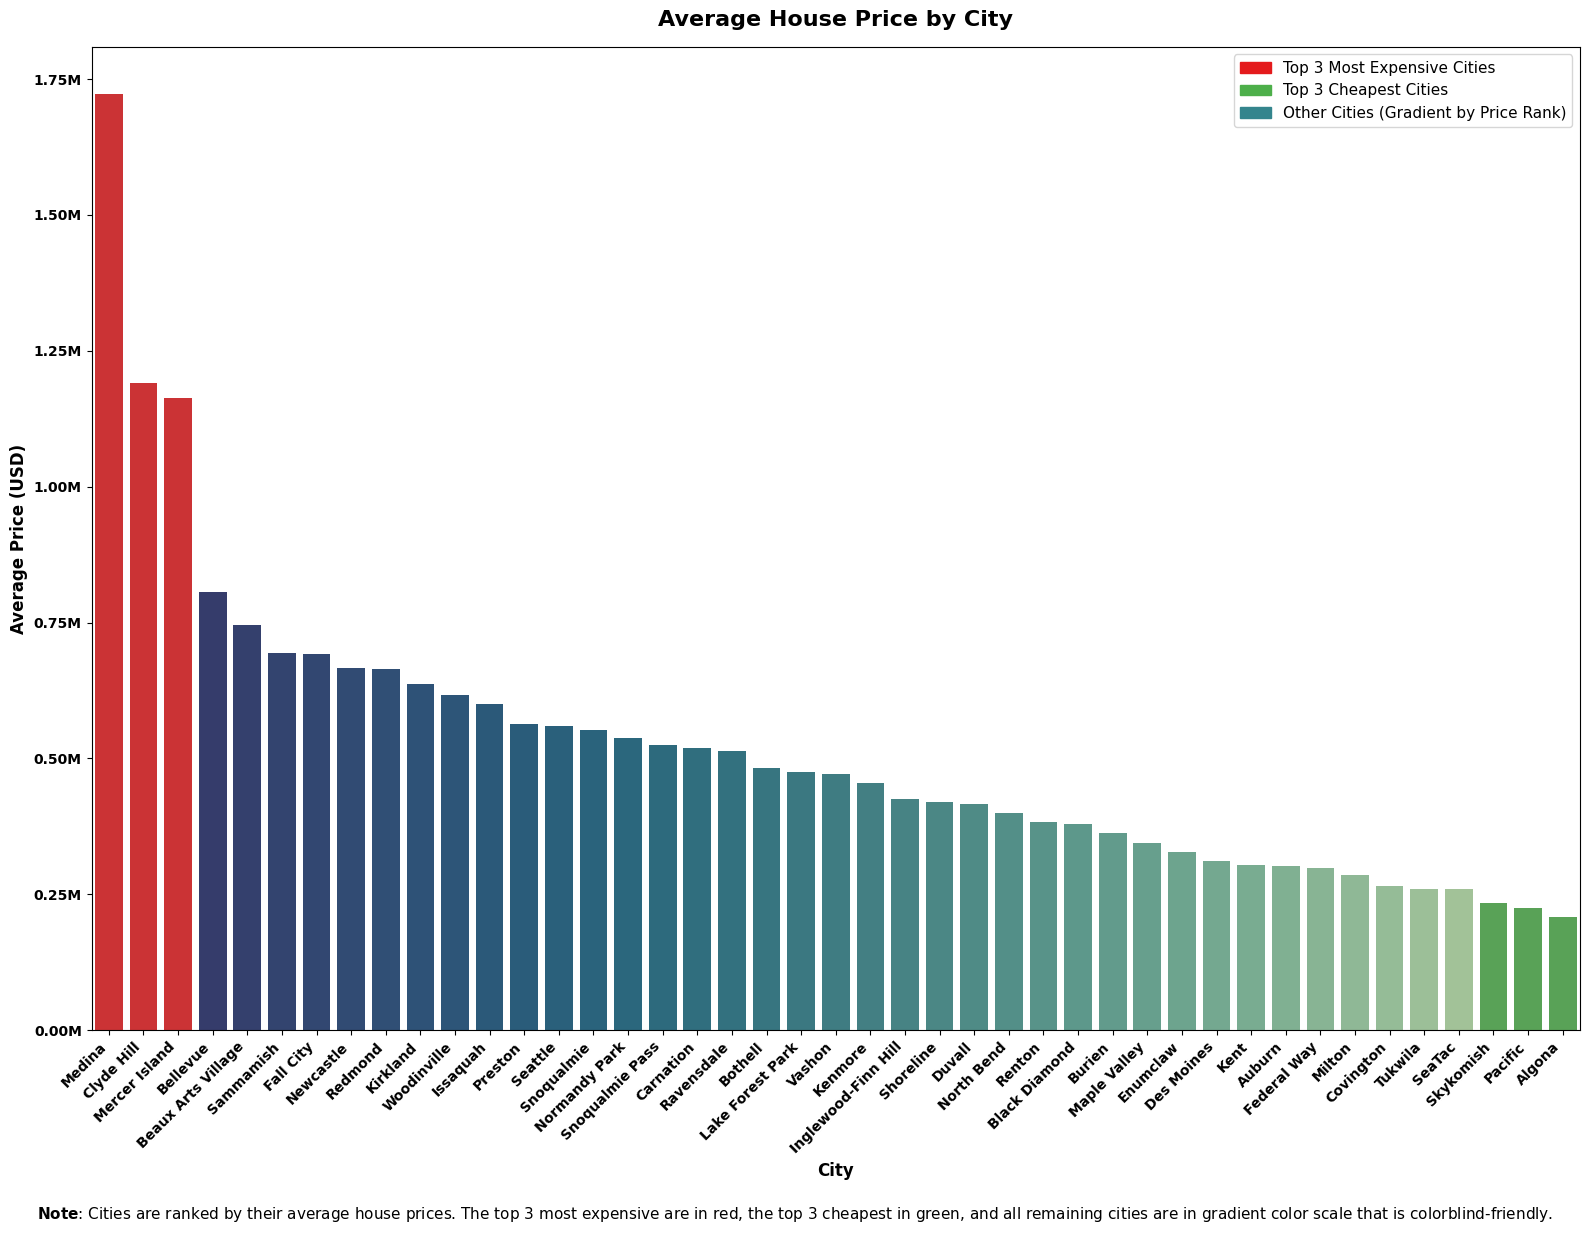

In [19]:
from matplotlib.ticker import FuncFormatter, MultipleLocator
import matplotlib.patches as mpatches

# Average House Price per City (descending so left → right is most → least expensive)
avg_price_city = cleaned_price_df.groupby("city")["price"].mean().sort_values(ascending=False)

# Identify special groups
top3_expensive = avg_price_city.head(3).index
top3_cheapest  = avg_price_city.tail(3).index

# Build a gradient for the "other" cities with better visibility (colorblind-safe)
others = [c for c in avg_price_city.index if c not in set(top3_expensive) | set(top3_cheapest)]
others_palette = sns.color_palette("crest_r", len(others))  # perceptually uniform, colorblind-safe
others_color_map = {city: others_palette[i] for i, city in enumerate(others)}

# Assign colors
colors = []
for city in avg_price_city.index:
    if city in top3_expensive:
        colors.append("#E41A1C")  # red
    elif city in top3_cheapest:
        colors.append("#4DAF4A")  # green
    else:
        colors.append(others_color_map[city])  # gradient from cividis

# Plot
plt.figure(figsize=(16, 12))
sns.barplot(x=avg_price_city.index, y=avg_price_city.values, palette=colors)

# Y-axis: show in millions with 0.25M steps
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x/1e6:.2f}M"))
ax.yaxis.set_major_locator(MultipleLocator(0.25e6))

# Labels & title
plt.xticks(rotation=45, ha="right", fontsize=10, weight="bold")
plt.yticks(fontsize=10, weight="bold")
plt.title("Average House Price by City", fontsize=16, weight="bold", pad=15)
plt.xlabel("City", fontsize=12, weight="bold")
plt.ylabel("Average Price (USD)", fontsize=12, weight="bold")

# Legend
red_patch = mpatches.Patch(color="#E41A1C", label="Top 3 Most Expensive Cities")
green_patch = mpatches.Patch(color="#4DAF4A", label="Top 3 Cheapest Cities")
blue_patch = mpatches.Patch(color=others_palette[len(others)//2], 
                            label="Other Cities (Gradient by Price Rank)")
plt.legend(handles=[red_patch, green_patch, blue_patch], loc="upper right", fontsize=11, frameon=True)

# Caption
plt.figtext(
    0.5, -0.02,
    r"$\bf{Note}$: Cities are ranked by their average house prices. "
    "The top 3 most expensive are in red, the top 3 cheapest in green, "
    "and all remaining cities are in gradient color scale that is colorblind-friendly.",
    wrap=True, ha="center", fontsize=11)

plt.tight_layout()
plt.show()

### **Correlation Analysis**

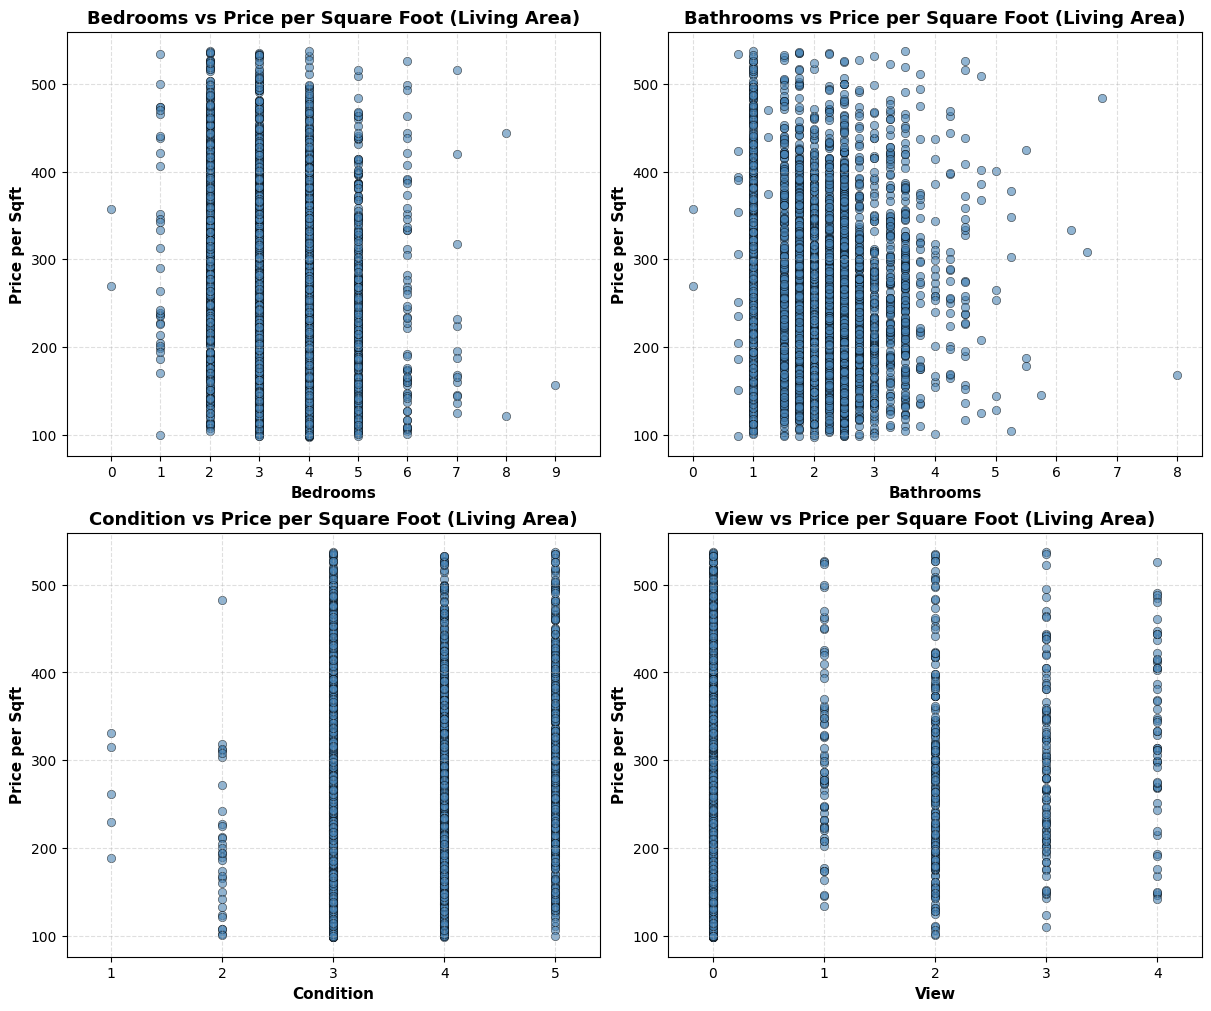

In [20]:
def plot_multiple_vs_price(df, columns, ncols=2):
    """
    Create multiple scatter plots of selected columns vs. price per square foot (living area).

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing the columns and 'price_per_sqft_living'.
    columns : list of str
        List of column names to plot on the x-axis.
    ncols : int, optional, default=2
        Number of subplot columns in the grid layout.

    Notes
    -----
    - Each subplot shows one column (x-axis) against 'price_per_sqft_living' (y-axis).
    - All subplots share the same style: scatter points with transparency, grid lines, and clean labels.
    - Extra/empty subplot spaces are removed automatically.
    """

    # Validate required target column
    if "price_per_sqft_living" not in df.columns:
        raise ValueError("DataFrame must contain 'price_per_sqft_living'.")

    n = len(columns)                             # number of plots
    nrows = (n + ncols - 1) // ncols             # rows (ceiling division)
    
    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols, 
        figsize=(6 * ncols, 5 * nrows), 
        constrained_layout=True
    )
    
    # Flatten axes for easier iteration
    if nrows * ncols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    # Loop through requested columns
    for i, col in enumerate(columns):
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame")
        
        # Scatter plot
        axes[i].scatter(
            df[col], 
            df["price_per_sqft_living"],
            alpha=0.6, 
            color="steelblue", 
            edgecolor="black", 
            linewidth=0.5
        )
        
        # Titles & labels
        axes[i].set_title(f"{col.replace('_', ' ').title()} vs Price per Square Foot (Living Area)", 
                          fontsize=13, fontweight="bold")
        axes[i].set_xlabel(col.replace('_', ' ').title(), fontsize=11, fontweight="bold")
        axes[i].set_ylabel("Price per Sqft", fontsize=11, fontweight="bold")
        
        # Format x-axis for categorical/discrete variables
        unique_vals = df[col].dropna().unique()
        if len(unique_vals) < 20:
            axes[i].set_xticks(sorted(unique_vals))
            axes[i].margins(x=0.1)
        
        # Grid style
        axes[i].grid(alpha=0.4, linestyle="--")

    # Remove unused subplot panels
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.show()

# Show the plot
plot_multiple_vs_price(
    cleaned_price_df,
    ['bedrooms', 'bathrooms', 'condition', 'view'],
    ncols=2)

In [21]:
# Remove rows where bedrooms = 0 or bathrooms = 0
cleaned_price_df = cleaned_price_df[
    (cleaned_price_df['bedrooms'] > 0) & 
    (cleaned_price_df['bathrooms'] > 0)
].copy()

print(f"Rows remaining after removing 0-bedroom/0-bathroom cases: {len(cleaned_price_df)}")
print(f"Shape after cleanup: {cleaned_price_df.shape}")

Rows remaining after removing 0-bedroom/0-bathroom cases: 4399
Shape after cleanup: (4399, 17)


Correlation Matrix:


,Living Area,Price,Bedrooms,Bathrooms,Condition,View,Waterfront
Living Area,1.000,0.739,0.601,0.759,-0.064,0.307,0.085
Price,0.739,1.000,0.380,0.575,0.055,0.370,0.152
Bedrooms,0.601,0.380,1.000,0.541,0.024,0.122,-0.006
Bathrooms,0.759,0.575,0.541,1.000,-0.126,0.203,0.056
Condition,-0.064,0.055,0.024,-0.126,1.000,0.061,0.003
View,0.307,0.370,0.122,0.203,0.061,1.000,0.301
Waterfront,0.085,0.152,-0.006,0.056,0.003,0.301,1.000



P-Value Matrix:


,Living Area,Price,Bedrooms,Bathrooms,Condition,View,Waterfront
Living Area,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Price,0.0,0.0000,0.0000,0.0000,0.0003,0.0000,0.0000
Bedrooms,0.0,0.0000,0.0000,0.0000,0.1187,0.0000,0.7134
Bathrooms,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002
Condition,0.0,0.0003,0.1187,0.0000,0.0000,0.0001,0.8420
View,0.0,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000
Waterfront,0.0,0.0000,0.7134,0.0002,0.8420,0.0000,0.0000


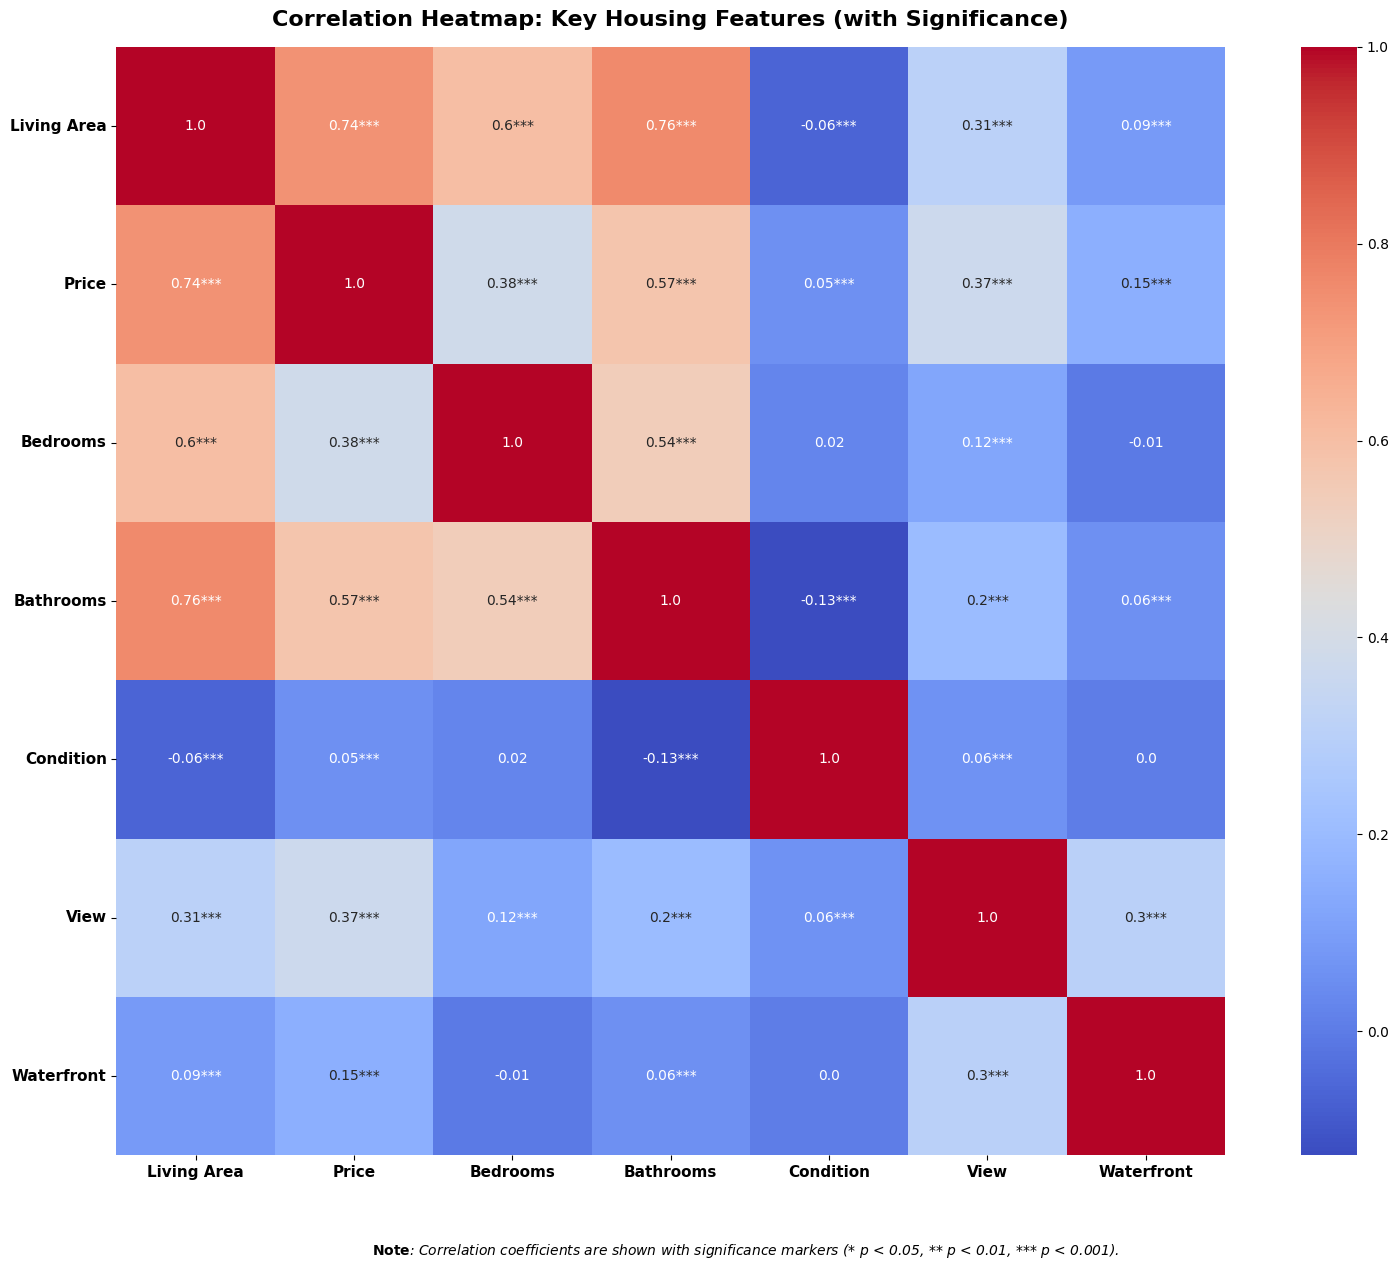

In [22]:
from scipy.stats import pearsonr

# Select features
features = ["sqft_living","price", "bedrooms", "bathrooms", "condition", "view", "waterfront"]

# Compute correlation and p-values
corr_matrix = pd.DataFrame(index=features, columns=features, dtype=float)
pval_matrix = pd.DataFrame(index=features, columns=features, dtype=float)

for f1 in features:
    for f2 in features:
        if f1 == f2:
            corr_matrix.loc[f1, f2] = 1.0
            pval_matrix.loc[f1, f2] = 0.0
        else:
            corr, pval = pearsonr(cleaned_price_df[f1], cleaned_price_df[f2])
            corr_matrix.loc[f1, f2] = corr
            pval_matrix.loc[f1, f2] = pval

# Rename columns for readability
feature_labels = {
    "sqft_living": "Living Area",
    "price": "Price",
    "bedrooms": "Bedrooms",
    "bathrooms": "Bathrooms",
    "condition": "Condition",
    "view": "View",
    "waterfront": "Waterfront",
}
corr_matrix.rename(columns=feature_labels, index=feature_labels, inplace=True)
pval_matrix.rename(columns=feature_labels, index=feature_labels, inplace=True)

# Display correlation and p-values
print("Correlation Matrix:")
display(corr_matrix.round(3))

print("\nP-Value Matrix:")
display(pval_matrix.round(4))

# Annotate correlation with significance stars
annot_matrix = corr_matrix.round(2).astype(str)
for i in corr_matrix.index:
    for j in corr_matrix.columns:
        if i != j:
            pval = pval_matrix.loc[i, j]
            if pval < 0.001:
                annot_matrix.loc[i, j] += "***"
            elif pval < 0.01:
                annot_matrix.loc[i, j] += "**"
            elif pval < 0.05:
                annot_matrix.loc[i, j] += "*"

# Plot heatmap with significance markers
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix.astype(float), 
    annot=annot_matrix, 
    cmap="coolwarm", 
    fmt="",   # leave fmt blank since annot_matrix has formatted text
    cbar=True, 
    square=True, 
    annot_kws={"size": 10}
)

# Title formatting
plt.title("Correlation Heatmap: Key Housing Features (with Significance)", fontsize=16, weight="bold", pad=15)

# Axis labels formatting
plt.xticks(fontsize=11, weight="bold", rotation=0, ha="center")
plt.yticks(fontsize=11, weight="bold", rotation=0)

# Caption with academic significance notation
plt.figtext(
    0.5, -0.05,
    r"$\bf{Note}$: Correlation coefficients are shown with significance markers "
    r"(* p < 0.05, ** p < 0.01, *** p < 0.001).",
    wrap=True, horizontalalignment='center', fontsize=10, style='italic'
)

plt.tight_layout()
plt.show()


### **Renovation Premiums by City**


In [23]:
from scipy.stats import ttest_ind

# Create a new column 'renovated_flag'. If 'yr_renovated' is greater than 0, set the flag to 1, otherwise set it to 0 (1 = renovated, 0 = not renovated)
cleaned_price_df["renovated_flag"] = (cleaned_price_df["yr_renovated"] > 0).astype(int)

# Compute average prices by city and renovation status
city_renovation_avg = cleaned_price_df.groupby(["city", "renovated_flag"])["price"].mean().unstack()

# Remove any cities that don't have data for both renovated (column 1) and not-renovated (column 0) homes.
city_renovation_avg = city_renovation_avg.dropna(subset=[0, 1])

# Calculate the percentage increase in price for renovated homes compared to non-renovated homes and store it in a new column - renovation premium (% difference)
city_renovation_avg["renovation_premium_%"] = ((city_renovation_avg[1] - city_renovation_avg[0]) / city_renovation_avg[0] * 100)

# T-test for significance by city
# Create an empty list to store the statistical test results for each city.
city_stats = []
# Loop through each unique city in the dataframe.
for city, group in cleaned_price_df.groupby("city"):
    # Get the prices for all renovated homes in the current city.
    renovated_prices = group[group["renovated_flag"] == 1]["price"]
    # Get the prices for all non-renovated homes in the current city.
    not_renovated_prices = group[group["renovated_flag"] == 0]["price"]
    
    # Check if there are enough samples (>5) in both groups to run a meaningful statistical test.
    if len(renovated_prices) > 5 and len(not_renovated_prices) > 5:
        # Perform an independent t-test to see if the price difference between the two groups is statistically significant.
        t_stat, p_val = ttest_ind(renovated_prices, not_renovated_prices, equal_var=False)
        # Add the city's name, t-statistic, and p-value to our results list.
        city_stats.append((city, t_stat, p_val))

# Convert the list of test results into a pandas DataFrame for easier analysis.
city_test_results = pd.DataFrame(city_stats, columns=["City", "T-statistic", "P-value"])
# Print the results, sorted by p-value to show the most statistically significant cities first.
display(city_test_results.sort_values("P-value").head())
print(f'The shape of the dataset: {city_test_results.shape}')

,City,T-statistic,P-value
25,Tukwila,-3.555808,0.003005
19,Renton,-2.922885,0.003869
12,Kirkland,-2.906709,0.004189
22,Seattle,-2.811524,0.004996
21,SeaTac,-2.889303,0.008837


The shape of the dataset: (28, 3)


In [24]:
# Merge results into summary table
# Combine the average price data with the statistical test results into a single table.
merge_renovation_test = city_renovation_avg.merge(
    # The 'city_test_results' DataFrame is merged with 'city_renovation_avg' based on the city name.
    city_test_results, left_index=True, right_on="City", how="left"
# Sort the final table to show cities with the highest renovation premium at the top.
).sort_values("renovation_premium_%", ascending=False)

# Filter out rows where T-statistic or P-value is NaN or 0
merge_renovation_test = merge_renovation_test.dropna(subset=["T-statistic", "P-value"])
merge_renovation_test = merge_renovation_test[(merge_renovation_test["T-statistic"] != 0) & (merge_renovation_test["P-value"] != 0)]

# Print the results
print("=== Renovation Summary Table ===")
display(merge_renovation_test)
print(f'The shape of the dataset: {merge_renovation_test.shape}')

=== Renovation Summary Table ===


,0,1,renovation_premium_%,City,T-statistic,P-value
16.0,5.029375e+05,5.665306e+05,12.644326,Normandy Park,0.449653,0.659391
14.0,3.371434e+05,3.718539e+05,10.295451,Maple Valley,1.259826,0.218494
15.0,1.126362e+06,1.236449e+06,9.773682,Mercer Island,0.623519,0.536933
4.0,5.035033e+05,5.458750e+05,8.415375,Carnation,0.226498,0.826270
13.0,4.532083e+05,4.866636e+05,7.381882,Lake Forest Park,0.673038,0.511581
26.0,4.577000e+05,4.854346e+05,6.059562,Vashon,0.420545,0.678136
24.0,5.478130e+05,5.664907e+05,3.409504,Snoqualmie,0.369410,0.715104
3.0,3.578538e+05,3.662426e+05,2.344217,Burien,0.161627,0.872163
11.0,3.044046e+05,2.998531e+05,-1.495216,Kent,-0.308946,0.758250
20.0,6.987134e+05,6.824318e+05,-2.330226,Sammamish,-0.447765,0.655317


The shape of the dataset: (28, 6)


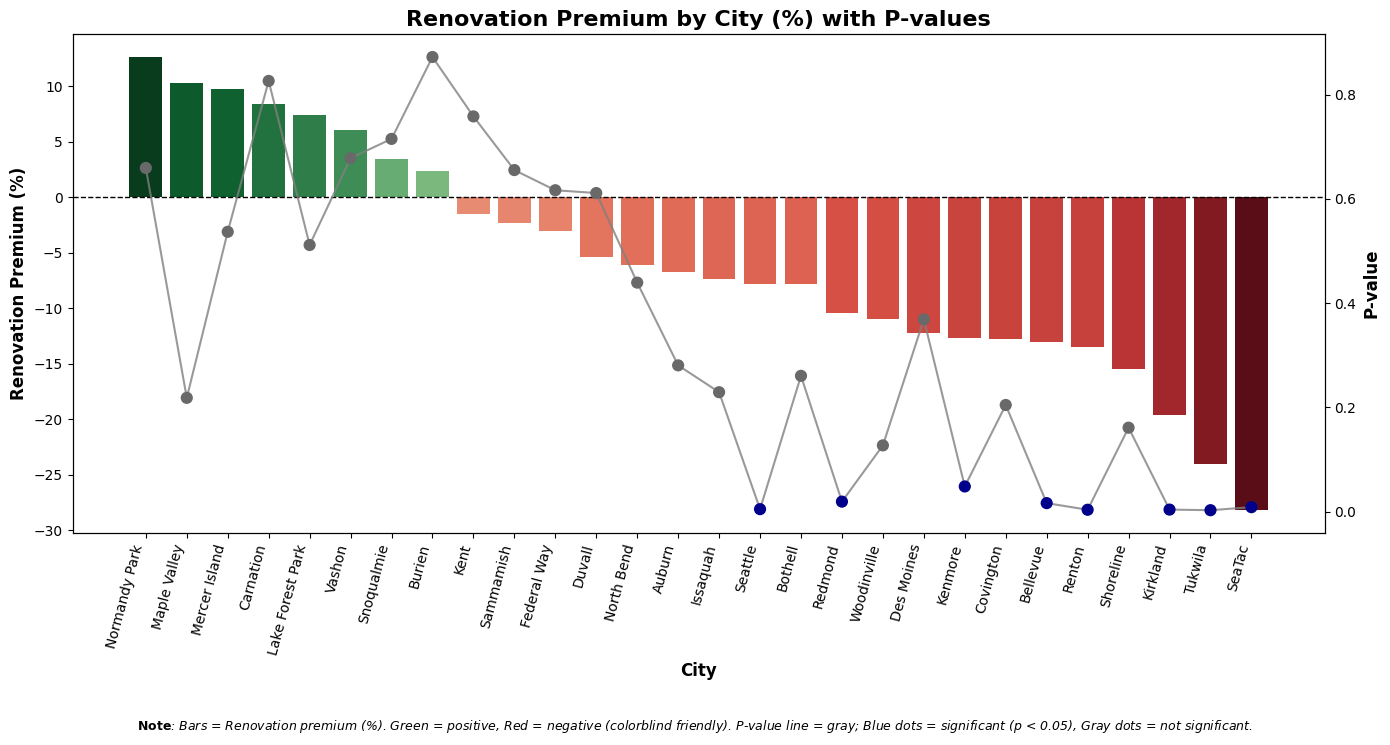

In [25]:
# Define a function to generate a list of colors for the bar chart.
# Stronger diverging color palette for bars (colorblind-friendly)
def get_bar_colors(values):
    # Find the highest value in the data to set the scale for positive numbers.
    max_val = values.max()
    # Find the lowest value in the data to set the scale for negative numbers.
    min_val = values.min()
    # Create an empty list to store the color for each bar.
    colors = []
    # Loop through each value in the input data.
    for v in values:
    # Check if the value is positive.  
        if v > 0:
            # If positive, assign a shade of green. Larger values get a darker green.
            # The '0.4 + 0.6 * ...' formula ensures the colors aren't too light.
            colors.append(plt.cm.Greens(0.4 + 0.6 * (v / max_val)))
        else:
            # If negative, assign a shade of red. More negative values get a darker red.
            colors.append(plt.cm.Reds(0.4 + 0.6 * (abs(v) / abs(min_val))))
    # Return the final list of colors.           
    return colors

# Generate the specific colors for the 'renovation_premium_%' column using the function above.
bar_colors = get_bar_colors(merge_renovation_test["renovation_premium_%"])

# Create a figure and a set of subplots (in this case, just one plot) with a specific size.
fig1, ax1 = plt.subplots(figsize=(14, 7))

# Barplot with enhanced colors
sns.barplot(
    # Specify the DataFrame to use for the plot.
    data=merge_renovation_test,
    # Set the 'City' column as the x-axis.
    x="City",
    # Set the 'renovation_premium_%' column as the y-axis.
    y="renovation_premium_%",
    # Apply the custom list of green and red colors generated earlier.
    palette=bar_colors,
    # Tell seaborn to draw this plot on our primary axes object 'ax1'.
    ax=ax1)

# Axis
ax1.set_ylabel("Renovation Premium (%)", fontsize=12, weight="bold")
ax1.set_xlabel("City", fontsize=12, weight="bold")
# Add a horizontal dashed line at y=0 to easily see positive vs. negative values.
ax1.axhline(0, color="black", linestyle="--", linewidth=1)

# Secondary axis for P-values
# Create a second y-axis ('ax2') that shares the same x-axis as the first plot.
ax2 = ax1.twinx()
# Set the label for the new secondary y-axis (right side).
ax2.set_ylabel("P-value", fontsize=12, weight="bold")

# Prepare P-value data
# Get the numerical positions for each city on the x-axis.
cities = np.arange(len(merge_renovation_test))
# Get the P-value for each city.
pvals = merge_renovation_test["P-value"].values

# Draw a line plot on the secondary axis to connect the P-value points.
# Always gray line connecting p-values
ax2.plot(cities, pvals, color="gray", linewidth=1.5, alpha=0.8)

# Create a list of colors: 'blue' if the p-value is significant (p < 0.05), otherwise 'dimgray'.
dot_colors = ["darkblue" if p < 0.05 else "dimgray" for p in pvals]
# Draw scatter plot dots on top of the line plot using the conditional colors.
ax2.scatter(cities, pvals, color=dot_colors, s=60, zorder=5)

# Set the city names as x-axis labels and rotate them for better readability.
ax1.set_xticklabels(merge_renovation_test["City"], rotation=75, ha="right")
# Set a title for the entire chart with a specified font size and weight.
plt.title("Renovation Premium by City (%) with P-values", fontsize=16, weight="bold")
# Adjust plot elements to fit into the figure area neatly.
fig1.tight_layout()

# Caption
plt.figtext(
    0.5, -0.05,     # Set the x-position of the text to be centered (0.5) and Set the y-position to be slightly below the chart (-0.05).
    r"$\bf{Note}$: Bars = Renovation premium (%). Green = positive, Red = negative (colorblind friendly). "
    "P-value line = gray; Blue dots = significant (p < 0.05), Gray dots = not significant.",
    ha="center", fontsize=9, style="italic")

# Display the final generated plot
plt.show()

### **Impact of House Age on Renovation Premium**

In [26]:
# Ensure house age is calculated
cleaned_price_df["sale_year"] = pd.to_datetime(cleaned_price_df["date"]).dt.year
cleaned_price_df["house_age"] = cleaned_price_df["sale_year"] - cleaned_price_df["yr_built"]

# Calculate average age of renovated houses per city
avg_renovated_age = (
    cleaned_price_df[cleaned_price_df["renovated_flag"] == 1]
    .groupby("city")["house_age"]
    .mean()
    .reset_index()
    .rename(columns={"house_age": "avg_age_renovated"}))

# Calculate average age of non-renovated houses
avg_not_renovated_age = (
    cleaned_price_df[cleaned_price_df["renovated_flag"] == 0]
    .groupby("city")["house_age"]
    .mean()
    .reset_index()
    .rename(columns={"house_age": "avg_age_not_renovated"})
)

# Merge both into one summary table
avg_age_comparison = pd.merge(
    avg_renovated_age,
    avg_not_renovated_age,
    on="city",
    how="inner"
)

# Add age difference (renovated - not renovated)
avg_age_comparison["age_difference"] = (
    avg_age_comparison["avg_age_renovated"] - avg_age_comparison["avg_age_not_renovated"]
)

print("=== Average Age of Renovated vs Non-Renovated Houses by City ===")
display(avg_age_comparison.head(10))

=== Average Age of Renovated vs Non-Renovated Houses by City ===


,city,avg_age_renovated,avg_age_not_renovated,age_difference
0,Algona,56.000000,14.000000,42.000000
1,Auburn,32.587302,32.833333,-0.246032
2,Bellevue,46.481132,35.584906,10.896226
3,Black Diamond,45.750000,19.333333,26.416667
4,Bothell,44.083333,24.000000,20.083333
5,Burien,57.476190,54.607143,2.869048
6,Carnation,33.625000,29.846154,3.778846
7,Clyde Hill,54.250000,53.333333,0.916667
8,Covington,31.727273,28.111111,3.616162
9,Des Moines,53.500000,44.680000,8.820000


In [27]:
# Extract the year from the 'date' column and store it in a new 'sale_year' column.
cleaned_price_df["sale_year"] = pd.to_datetime(cleaned_price_df["date"]).dt.year

# Calculate the age of each house at the time of sale and store it in a new 'house_age' column.
cleaned_price_df["house_age"] = cleaned_price_df["sale_year"] - cleaned_price_df["yr_built"]

# Create an empty list to hold the calculated statistics for each city.
age_effect_stats = []

# Group the DataFrame by city and loop through each city's data.
for city, group in cleaned_price_df.groupby("city"):
    # Check if the city has both renovated and non-renovated houses.
    if group["renovated_flag"].nunique() == 2:  # must have both groups
        # Calculate the average age of renovated houses in the current city.
        avg_age_renovated = group[group["renovated_flag"] == 1]["house_age"].mean()
        # Calculate the average age of non-renovated houses in the current city.
        avg_age_not = group[group["renovated_flag"] == 0]["house_age"].mean()
        # Calculate the difference in average age between the two groups.
        premium = avg_age_renovated - avg_age_not
        # Add the city's name and the calculated age stats to our list.
        age_effect_stats.append((city, avg_age_renovated, avg_age_not, premium))

# Create a new pandas DataFrame from the list of collected statistics.
age_effect_table = pd.DataFrame(age_effect_stats, 
                                # Assign clear column names to the new DataFrame.
                                columns=["City", "Avg Age (Renovated)", "Avg Age (Not Renovated)", "Age Difference"])

# Print the first 5 rows of the newly created table to check the results.
display(age_effect_table.head(10))

# Merge the age analysis table with the previously created renovation premium table.
# The 'on="City"' argument ensures they are joined by the city name.
merged_renovation_effects = merge_renovation_test.merge(age_effect_table, on="City", how="inner")

,City,Avg Age (Renovated),Avg Age (Not Renovated),Age Difference
0,Algona,56.000000,14.000000,42.000000
1,Auburn,32.587302,32.833333,-0.246032
2,Bellevue,46.481132,35.584906,10.896226
3,Black Diamond,45.750000,19.333333,26.416667
4,Bothell,44.083333,24.000000,20.083333
5,Burien,57.476190,54.607143,2.869048
6,Carnation,33.625000,29.846154,3.778846
7,Clyde Hill,54.250000,53.333333,0.916667
8,Covington,31.727273,28.111111,3.616162
9,Des Moines,53.500000,44.680000,8.820000


In [28]:
# Correlation between renovation premium and age difference
# Print a descriptive header for the correlation output.
print("\nCorrelation between Age Difference and Renovation Premium:")
# Calculate and print the correlation matrix between the 'Age Difference' and 'renovation_premium_%' columns.
display(merged_renovation_effects[["Age Difference", "renovation_premium_%"]].corr())


Correlation between Age Difference and Renovation Premium:


,Age Difference,renovation_premium_%
Age Difference,1.000000,-0.333302
renovation_premium_%,-0.333302,1.000000


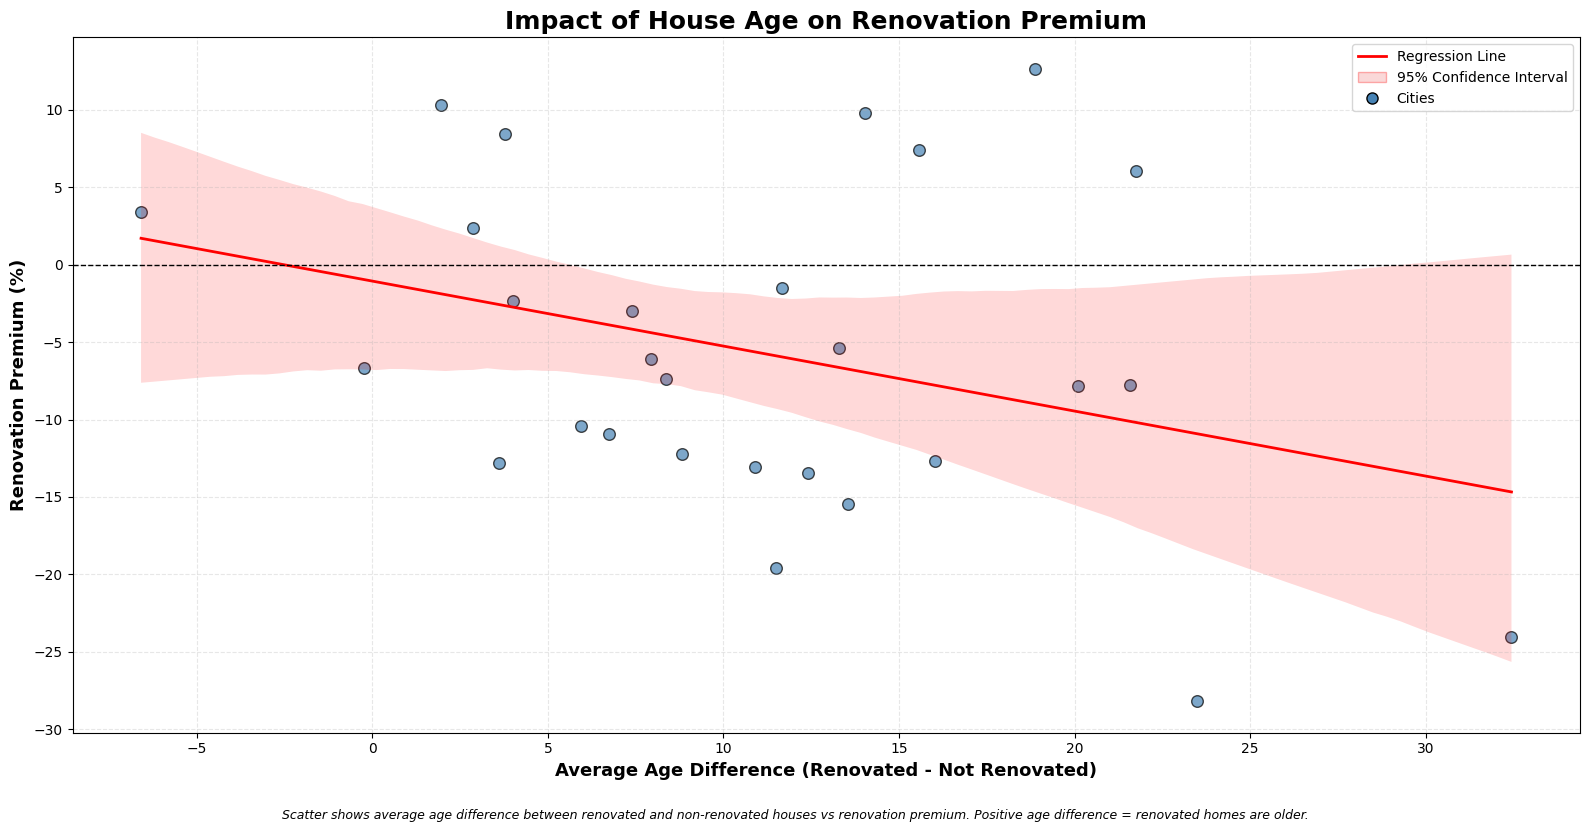

In [29]:
from sklearn.linear_model import LinearRegression
# Plot scatter + regression
plt.figure(figsize=(16, 8))  # Bigger graph
sns.regplot(
    data=merged_renovation_effects,
    x="Age Difference",
    y="renovation_premium_%",
    scatter_kws={"s": 70, "alpha": 0.7, "color": "steelblue", "edgecolor": "k"},
    line_kws={"color": "red", "lw": 2}
)

# Titles and labels
plt.title("Impact of House Age on Renovation Premium", fontsize=18, weight="bold")
plt.xlabel("Average Age Difference (Renovated - Not Renovated)", fontsize=13, weight="bold")
plt.ylabel("Renovation Premium (%)", fontsize=13, weight="bold")

# Reference line
plt.axhline(0, color="black", linestyle="--", linewidth=1)

# Optioonal: Add regression equation and R² in desired format
#plt.text(0.05, 0.95,
#    f"y = {intercept:.2f} + {slope:.2f}x\nR² = {r2:.2f}",
#    transform=plt.gca().transAxes,
#    fontsize=12, verticalalignment="top", bbox=dict(facecolor="white", alpha=0.7, edgecolor="gray"))

# Grid and layout
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()

# Smaller caption
plt.figtext(
    0.5, -0.03,
    "Scatter shows average age difference between renovated and non-renovated houses vs renovation premium. "
    "Positive age difference = renovated homes are older.",
    ha="center", fontsize=9, style="italic"
)

# After plotting with sns.regplot
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Custom legend
legend_elements = [
    Line2D([0], [0], color='red', lw=2, label='Regression Line'),
    Patch(facecolor='lightcoral', edgecolor='red', alpha=0.3, label='95% Confidence Interval'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='steelblue', markeredgecolor='k',
           markersize=8, label='Cities')
]

plt.legend(handles=legend_elements, loc='upper right')

plt.show()

In [30]:
from scipy.stats import linregress

# Run regression using scipy for more stats
slope, intercept, r_value, p_value, std_err = linregress(
    merged_renovation_effects["Age Difference"],
    merged_renovation_effects["renovation_premium_%"])

# Create a summary table
regression_summary = pd.DataFrame({
    "Intercept": [intercept],
    "Slope (B)": [slope],
    "R²": [r_value**2],
    "p-value": [p_value],
    "Std Error": [std_err]
})

print("=== Regression Line Summary ===")
display(regression_summary.round(4))

=== Regression Line Summary ===


,Intercept,Slope (B),R²,p-value,Std Error
0,-1.0574,-0.4199,0.1111,0.0831,0.2329


# Prediction

In [31]:
# Create dummies for 'city'
city_dummies = pd.get_dummies(cleaned_price_df['city'], dtype=int)
display(city_dummies)

,Algona,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,...,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4595,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4596,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Concatenate cleaned_price_df and dummies DataFrames along columns (axis=1) #RMSE
concatenated_df = pd.concat([cleaned_price_df, city_dummies], axis=1)

# Display the head of the new DataFrame to see the result
display(concatenated_df.head())

# Print the shape of the new DataFrame
print(f"Shape after concatenation: {concatenated_df.shape}")

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,yr_built,...,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,1.5,0,0,3,1955,...,0,0,0,1,0,0,0,0,0,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,1.0,0,0,4,1966,...,0,0,0,0,0,0,0,0,0,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,1.0,0,0,4,1963,...,0,0,0,0,0,0,0,0,0,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,1.0,0,0,4,1976,...,0,0,0,0,0,0,0,0,0,0
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,1.0,0,0,3,1976,...,0,0,0,0,0,0,0,0,0,0


Shape after concatenation: (4399, 63)


In [33]:
# Inspect columns name for concatenated_df
concatenated_df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'city',
       'country', 'state', 'zip', 'price_per_sqft_living', 'price_bin',
       'renovated_flag', 'sale_year', 'house_age', 'Algona', 'Auburn',
       'Beaux Arts Village', 'Bellevue', 'Black Diamond', 'Bothell', 'Burien',
       'Carnation', 'Clyde Hill', 'Covington', 'Des Moines', 'Duvall',
       'Enumclaw', 'Fall City', 'Federal Way', 'Inglewood-Finn Hill',
       'Issaquah', 'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park',
       'Maple Valley', 'Medina', 'Mercer Island', 'Milton', 'Newcastle',
       'Normandy Park', 'North Bend', 'Pacific', 'Preston', 'Ravensdale',
       'Redmond', 'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline',
       'Skykomish', 'Snoqualmie', 'Snoqualmie Pass', 'Tukwila', 'Vashon',
       'Woodinville'],
      dtype='object')

In [34]:
# Drop irrelevant columns
concatenated_df = concatenated_df.drop(columns=['date', 'yr_built', 'yr_renovated', 'city', 'country', 'state', 'zip', 'price_per_sqft_living', 'price_bin'])

# Display the head of the DataFrame to confirm the column is dropped
display(concatenated_df.head())
display(concatenated_df.tail())

# Print the shape to see the reduced number of columns
print(f"Shape after dropping selected columns: {concatenated_df.shape}")

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,renovated_flag,sale_year,...,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville
0,313000.0,3.0,1.50,1340,1.5,0,0,3,1,2014,...,0,0,0,1,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,1.0,0,0,4,0,2014,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,1.0,0,0,4,0,2014,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,1.0,0,0,4,1,2014,...,0,0,0,0,0,0,0,0,0,0
6,335000.0,2.0,2.00,1350,1.0,0,0,3,0,2014,...,0,0,0,0,0,0,0,0,0,0


,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,renovated_flag,sale_year,...,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville
4594,210614.285714,3.0,2.50,1610,2.0,0,0,3,0,2014,...,0,0,0,0,0,0,0,0,0,0
4595,308166.666667,3.0,1.75,1510,1.0,0,0,4,1,2014,...,0,0,1,0,0,0,0,0,0,0
4596,534333.333333,3.0,2.50,1460,2.0,0,0,3,1,2014,...,0,0,0,0,0,0,0,0,0,0
4597,416904.166667,3.0,2.50,3010,2.0,0,0,3,0,2014,...,0,0,0,0,0,0,0,0,0,0
4599,220600.000000,3.0,2.50,1490,2.0,0,0,4,0,2014,...,0,0,0,0,0,0,0,0,0,0


Shape after dropping selected columns: (4399, 54)


In [35]:
# Import necessary libraries for ML and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [36]:
# Make a copy of the dataset to use as features (X)
# Drop the target column 'price' since it's what we want to predict
X = concatenated_df.copy()
X.drop(columns=["price"], inplace=True)

# Define the target variable (Y) as the 'price' column
Y = concatenated_df["price"].copy()

In [37]:
print(f"Shape after dropping selected columns: {X.shape}")
print(f"Shape after dropping selected columns: {Y.shape}")

Shape after dropping selected columns: (4399, 53)
Shape after dropping selected columns: (4399,)


In [38]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Linear regression model
linear_classified = LinearRegression()
linear_classified.fit(X_train, Y_train)

# Evaluate
train_score = linear_classified.score(X_train, Y_train)
test_score = linear_classified.score(X_test, Y_test)

print("Train R²:", train_score)
print("Test R²:", test_score)

Train R²: 0.7429453617508418
Test R²: 0.7602652982715369


In [39]:
from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit

# Cross valiadation using ShuffleSplit
sscv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
scores = cross_val_score(LinearRegression(), X, Y, cv=sscv)

print("Scores:", scores)
print("Mean score:", scores.mean())

Scores: [0.7602653  0.73355421 0.75611102 0.7662402  0.7448485 ]
Mean score: 0.7522038461167745


In [40]:
# Define KFold with 5 splits and shuffling
kfcv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(LinearRegression(), X, Y, cv=kfcv)

print("Scores:", scores)
print("Mean score:", scores.mean())

Scores: [0.7602653  0.75186224 0.72031012 0.74016478 0.7213618 ]
Mean score: 0.7387928490284003


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions on training and test sets
Y_train_pred = linear_classified.predict(X_train)
Y_test_pred = linear_classified.predict(X_test)

# --- Training set evaluation ---
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(Y_train, Y_train_pred)

# --- Test set evaluation ---
test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_test_pred)

print("=== Training Data Evaluation ===")
print(f"MAE: {train_mae:.4f}")
print(f"MSE: {train_mse:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"R²: {train_r2:.4f}")

print("\n=== Test Data Evaluation ===")
print(f"MAE: {test_mae:.4f}")
print(f"MSE: {test_mse:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"R²: {test_r2:.4f}")

=== Training Data Evaluation ===
MAE: 104933.3167
MSE: 24654984166.0007
RMSE: 157019.0567
R²: 0.7429

=== Test Data Evaluation ===
MAE: 104191.7925
MSE: 27224294321.1245
RMSE: 164997.8616
R²: 0.7603


In [42]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, Y, use_kfold=False):
    """
    Perform GridSearchCV to find the best model and hyperparameters among
    Linear Regression, Lasso, and Decision Tree Regressor.

    Parameters
    ----------
    X : array-like or DataFrame
        Feature matrix for training.
    Y : array-like or Series
        Target variable.
    use_kfold : bool, default=False
        If False, use ShuffleSplit cross-validation.
        If True, use K-Fold cross-validation.

    Returns
    -------
    pd.DataFrame
        A DataFrame with columns:
        - 'model' : str, model name
        - 'best_score' : float, best cross-validation score
        - 'best_params' : dict, best hyperparameters
    """

    # Define models and parameter grids
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                # normalize is deprecated; using fit_intercept as an example param
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(max_iter=10000),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []

    # Choose CV strategy
    if use_kfold:
        cv = KFold(n_splits=5, shuffle=True, random_state=0)
    else:
        cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    # Run GridSearchCV for each model
    for algo_name, config in algos.items():
        gs = GridSearchCV(
            estimator=config['model'],
            param_grid=config['params'],
            cv=cv,
            return_train_score=False
        )
        gs.fit(X, Y) # Parameter
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [43]:
# Using ShuffleSplit
results_shuffle = find_best_model_using_gridsearchcv(X, Y, use_kfold=False)
display(results_shuffle)

# Using K-Fold
results_kfold = find_best_model_using_gridsearchcv(X, Y, use_kfold=True)
display(results_kfold)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.069e+13, tolerance: 3.499e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.556e+13, tolerance: 3.401e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.972e+13, tolerance: 3.390e

,model,best_score,best_params
0,linear_regression,0.751531,{'fit_intercept': False}
1,lasso,0.751346,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.554091,"{'criterion': 'squared_error', 'splitter': 'ra..."


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.306e+13, tolerance: 3.499e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.351e+13, tolerance: 3.464e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.181e+13, tolerance: 3.459e

,model,best_score,best_params
0,linear_regression,0.740640,{'fit_intercept': False}
1,lasso,0.740582,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.482456,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [44]:
def train_and_predict_price(df, city, bedrooms, bathrooms, sqft_living, waterfront, view, condition, model_type="linear"):
    """
    Train a regression model (Linear, Lasso, or Decision Tree) 
    and predict house price based on selected features.

    Parameters
    ----------
    df : pd.DataFrame
        The housing dataset (must include target column 'price' and relevant features).
    city : str
        The city name (one-hot encoded in df).
    bedrooms : int or float
        Number of bedrooms.
    bathrooms : int or float
        Number of bathrooms.
    sqft_living : int
        Living area in square feet.
    waterfront : int (0 or 1)
        Whether the house is waterfront.
    view : int
        View rating (0–4 scale typically).
    condition : int
        Condition rating (1–5 scale typically).
    model_type : str, default="linear"
        Which model to use: "linear", "lasso", or "tree".

    Returns
    -------
    float
        Predicted house price.
    """

    # Features to use
    feature_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'condition'] + list(df.filter(like=city).columns)

    # X and y
    X = df[feature_cols]
    Y = df['price']

    # Train-test split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Select model
    if model_type == "linear":
        regressor = LinearRegression()
    elif model_type == "lasso":
        regressor = Lasso(alpha=0.1)  # you can tune alpha
    elif model_type == "tree":
        regressor = DecisionTreeRegressor(random_state=42)
    else:
        raise ValueError("model_type must be one of: 'linear', 'lasso', 'tree'")

    # Build pipeline (scaling + regression, scaling only needed for linear/lasso)
    if model_type in ["linear", "lasso"]:
        model = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', regressor)
        ])
    else:
        model = regressor  # Decision tree doesn’t need scaling

    # Train model
    model.fit(X_train, Y_train)

    # Build input row for prediction
    input_data = {col: 0 for col in feature_cols}  # initialize with 0
    input_data.update({
        'bedrooms': bedrooms,
        'bathrooms': bathrooms,
        'sqft_living': sqft_living,
        'waterfront': waterfront,
        'view': view,
        'condition': condition
    })
    if city in df.columns:
        input_data[city] = 1  # one-hot encode the city

    input_df = pd.DataFrame([input_data])

    # Predict
    predicted_price = model.predict(input_df)[0]

    return predicted_price

In [45]:
# Example usage:
pred_price = train_and_predict_price(
    concatenated_df,
    city="Seattle",
    bedrooms=3,
    bathrooms=2,
    sqft_living=1500,
    waterfront=0,
    view=1,
    condition=3,
    model_type="linear")  # choose "linear", "lasso", or "tree"

print(f"Predicted price: ${pred_price:,.2f}")

Predicted price: $494,982.97


In [46]:
def visualize_city_prices(df, city, bedrooms, bathrooms, sqft_living, waterfront, view, condition, predicted_price=None, sqft_tol=0.10):
    """
    Visualize price distribution for houses of similar caliber in the chosen city,
    using a ±sqft tolerance window.

    Parameters
    ----------
    sqft_tol : float
        Percentage tolerance around sqft_living (e.g., 0.10 => ±10%).
    """

    if city not in df.columns:
        raise ValueError(f"City '{city}' not found in dataset columns.")

    # Comparable filter (adds ±sqft window)
    sqft_low  = sqft_living * (1 - sqft_tol)
    sqft_high = sqft_living * (1 + sqft_tol)
    mask = (
        (df[city] == 1) &
        (df['bedrooms'] == bedrooms) &
        (df['bathrooms'] == bathrooms) &
        (df['condition'] == condition) &
        (df['sqft_living'].between(sqft_low, sqft_high))
    )
    city_data = df.loc[mask, 'price']

    if city_data.empty:
        raise ValueError(
            "No comparable homes found with the given filters. "
            "Try increasing sqft_tol or relaxing criteria."
        )

    plt.figure(figsize=(12, 6))
    ax = sns.histplot(city_data, bins=30, kde=True, color="steelblue", edgecolor="black")

    # Predicted price marker (legend shows the exact value)
    if predicted_price is not None:
        plt.axvline(predicted_price, color="red", linestyle="--", linewidth=2,
                    label=f"Predicted Price: ${predicted_price:,.0f}")

    # Consistent x-axis formatting in millions (e.g., $0.5M, $1.0M, ...)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))

    # ✅ Force integer y-axis ticks (no 0.5 steps)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_ylim(bottom=0)  # keep baseline at 0

    # Title & labels
    plt.title(
        f"Predicted vs Actual Price Distribution (Comparable Homes)\n"
        f"Houses in {city} with {bedrooms} BR, {bathrooms} BA, ~{sqft_living} sqft (±{int(sqft_tol*100)}%), Condition {condition}",
        fontsize=16, weight="bold"
    )
    plt.xlabel("House Price", fontsize=14)
    plt.ylabel("Number of Houses", fontsize=14)
    if predicted_price is not None:
        plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


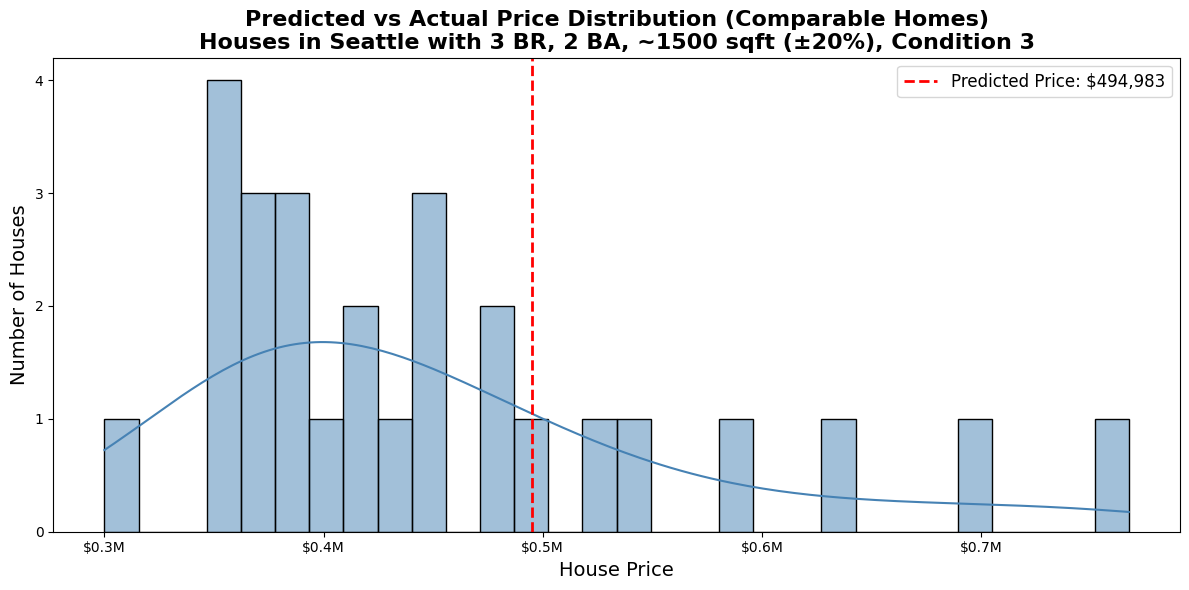

In [47]:
# Example usage:
visualize_city_prices(
    concatenated_df,
    city="Seattle",
    bedrooms=3,
    bathrooms=2,
    sqft_living=1500,
    waterfront=0,
    view=0,
    condition=3,
    predicted_price=pred_price,
    sqft_tol=0.20)  # try 0.05 for ±5% or 0.20 for ±20%